Plots: K2 Campaign 8, bad objects

In [6]:
from agn_everest. analysis import *

from astropy.io import fits
from lightkurve.correctors import SFFCorrector, PLDCorrector
from astropy.convolution import convolve, Box1DKernel
import richardsplot

#import matplotlib.gridspec as gridspec

---

In [7]:
# C8 channel 55
campaign=8
#epics_m = [220171151, 220176344, 220173191, 220176624]
#mags_m = [12.712, 12.966, 15.671, 18.103]

epics_m = [220171151, 220176344, 220176624]
mags_m = [12.712, 12.966, 18.103]

In [8]:
def save_VJ_lightcurve(epic, c):
    """
    Returns MAST server Vanderburg and Johnson light curve path
    """
    if len(str(c)) < 2: c_str = '0'+str(c)
    else: c_str = str(c)

    epic = str(int(epic))
    XXXX = epic[:4]
    YYZZZ = epic[4:]

    url_path = "http://archive.stsci.edu/hlsps/k2sff/c%s/%s00000/%s/hlsp_k2sff_k2_lightcurve_%s-c%s_kepler_v1_llc.fits"%(c_str, XXXX, YYZZZ, epic, c_str)
    
    return url_path


INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220171151.


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220176344'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220176344'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/76000/ktwo220176344-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/76000/ktwo220176344-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176344-c08_lc/ktwo220176344-c08_lpd-targ.fits.gz with expected size 7727931.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176344-c08_lc/ktwo220176344-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176344-c08_lc/ktwo220176344-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220176344.


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220176624'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220176624'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/76000/ktwo220176624-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/76000/ktwo220176624-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176624-c08_lc/ktwo220176624-c08_lpd-targ.fits.gz with expected size 4580217.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176624-c08_lc/ktwo220176624-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176624-c08_lc/ktwo220176624-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220176624.
WARNING [matplotlib.font_manager._findfont_cached()]: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


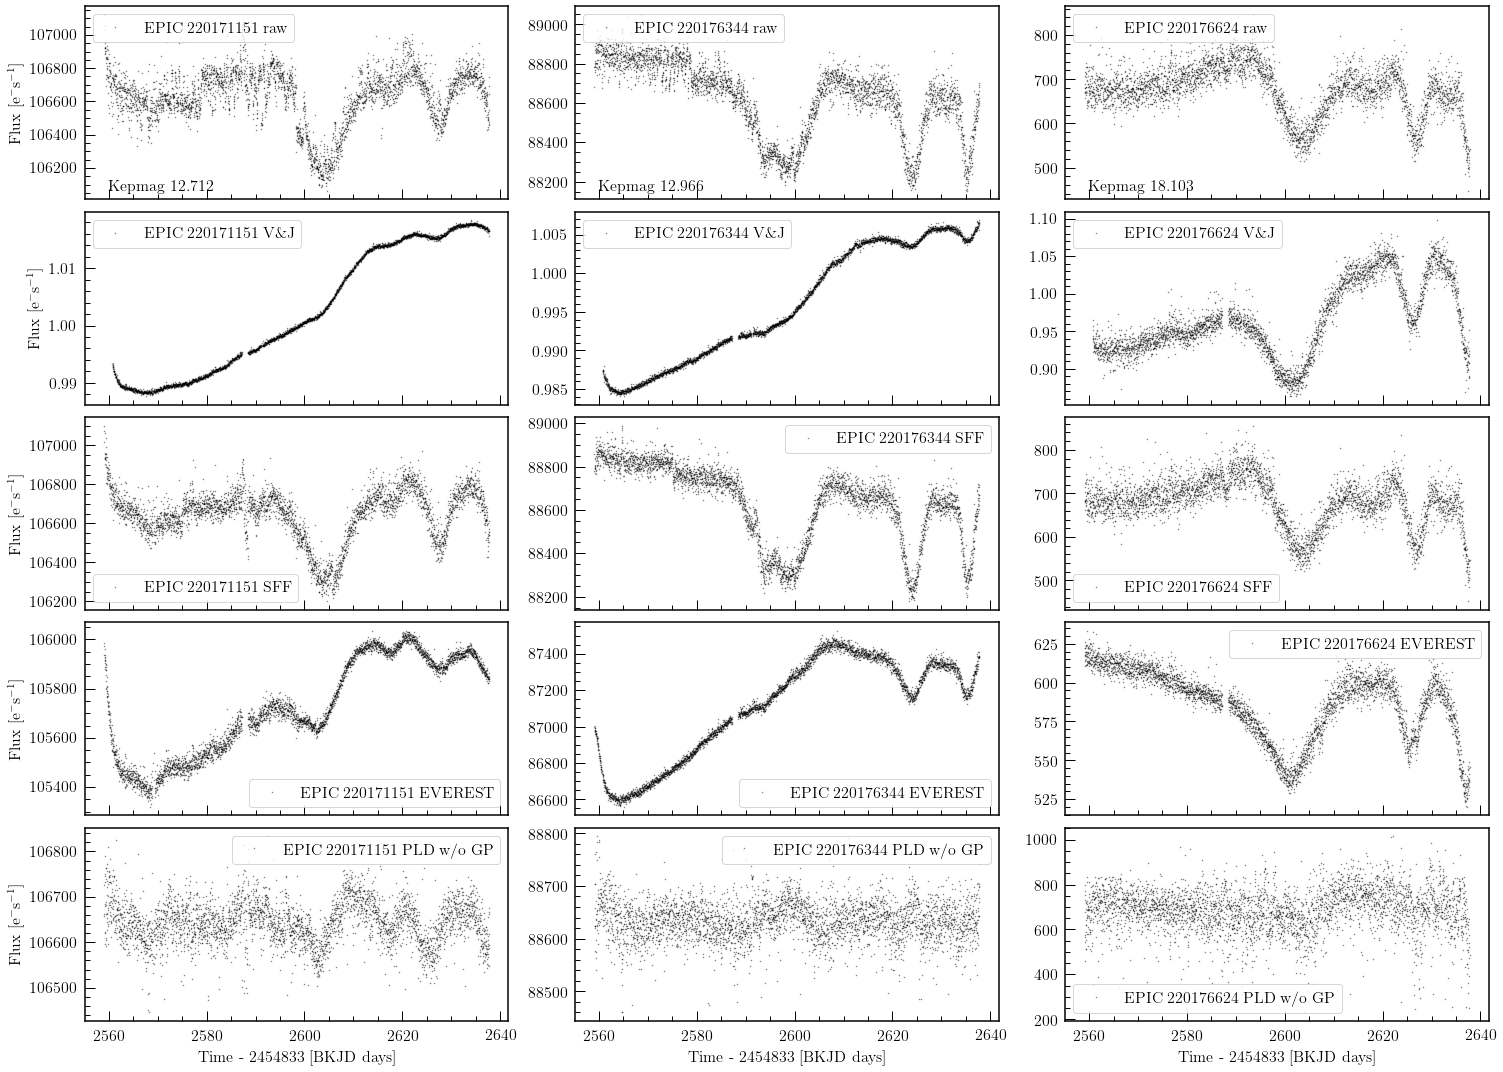

In [10]:
fig, ax = plt.subplots(5, len(epics_m), figsize=(21,15), sharex=True)
folder = "k2sff/Campaign8/"
for i, epic in enumerate(epics_m):

    # --------------------------------RAW--------------------------------
    genuine_tpf = lk.search_targetpixelfile(epic, mission='K2', campaign=8).download()
    cor_lc = genuine_tpf.to_lightcurve(aperture_mask='all')
    # remove spurious
    _, spurious_cadences = cor_lc.flatten().remove_outliers(return_mask=True)
    lc_clean_raw = cor_lc[~spurious_cadences]

    # plot
    lc_clean_raw.plot(normalize=False, color='k', marker = '.', ls='', alpha=0.5, ax=ax[0, i], label = "EPIC %s raw"%epic)
    ax
    
    # add on kepmag
    ax[0,i].text(lc_clean_raw.time[30], np.min(lc_clean_raw.flux), "Kepmag %.3f"%mags_m[i], fontsize=16)
    # --------------------------------Vanderburg&Johnson SFF--------------------------------
    # get vanderburg and johnson corrected
    with fits.open(folder+"hlsp_k2sff_k2_lightcurve_%s-c%s_kepler_v1_llc.fits"%(epic, "08")) as hdu:
        time = hdu['BESTAPER'].data['T']
        cadence = hdu['BESTAPER'].data['CADENCENO']
        flux = hdu['BESTAPER'].data['FCOR']
        channel = hdu['PRIMARY'].header['CHANNEL']

    # remove outliers
    lc = lk.LightCurve(time=time, flux=flux)
    _, spurious_cadences = lc.flatten().remove_outliers(return_mask=True)
    lc_clean_vj = lc[~spurious_cadences]

    # plot
    lc_clean_vj.plot(normalize=False, color='k', marker = '.', ls='', alpha=0.5, ax=ax[1, i], label = "EPIC %s V\&J"%epic)

    
    # --------------------------------lightkurve SFF----------------------------------------
    corrector = lk.SFFCorrector(genuine_tpf.to_lightcurve(aperture_mask='all'))
    cor_lc = corrector.correct(genuine_tpf.pos_corr2, genuine_tpf.pos_corr1, niters=4, windows=5, bins=7, restore_trend=True)
    
    # put in lightkurve 
    _, spurious_cadences = cor_lc.flatten().remove_outliers(return_mask=True)
    lc_clean_sff = cor_lc[~spurious_cadences]

    # subtract 372.53 day sine fit (like in the ARANZANA paper)
    #lc_clean_sff.time, lc_clean_sff.flux = subtract_sine(lc_clean_sff.time, lc_clean_sff.flux)
    
    # plot
    lc_clean_sff.plot(normalize=False, color='k', marker = '.', ls='', alpha=0.5, ax=ax[2,i], label = "EPIC %s SFF"%epic)
    
    # --------------------------------EVEREST PLD-------------------------------------------
    lc_eve_ = everest.Everest(epic, 8)
    cadno =  np.arange(len(lc_eve_.time))
    mask = (np.isin(cadno, np.concatenate([lc_eve_.nanmask, lc_eve_.badmask, lc_eve_.mask])))
    
    lc_eve = lk.LightCurve(time=lc_eve_.time[~mask], flux=lc_eve_.flux[~mask])
    
    # plot
    lc_eve.plot(normalize=False, color='k', marker = '.', ls='', alpha=0.5, ax=ax[3, i], label = "EPIC %s EVEREST"%epic)
    
    # --------------------------------lightkurve PLD----------------------------------------

    corrector = lk.PLDCorrector(genuine_tpf)
    cor_lc = corrector.correct(use_gp=False, aperture_mask="all") # trun off GP kernel
    
    # background subtraction (not currently used)
    
    # put  remove spurious
    _, spurious_cadences = cor_lc.flatten().remove_outliers(return_mask=True)
    lc_clean_pld = cor_lc[~spurious_cadences]

    # plot
    lc_clean_pld.plot(normalize=False, color='k', marker = '.', ls='', alpha=0.5, ax=ax[4,i],label="EPIC %s PLD w/o GP"%epic)
    
    # --------------------------------Misc. Plotting--------------------------------
    
    
    ax[0, i].legend(fontsize=16, loc="upper left")
    ax[1, i].legend(fontsize=16)
    ax[2, i].legend(fontsize=16)
    ax[3, i].legend(fontsize=16)
    ax[4, i].legend(fontsize=16)
    
    #ax[i].yaxis.label.set_fontsize(16)
    #ax[i].legend(loc='upper left', fontsize=16)
    ax[0, i].set_xlabel("")
    ax[1, i].set_xlabel("")
    ax[2, i].set_xlabel("")
    ax[3, i].set_xlabel("")
    ax[4, i].set_xlabel("Time - 2454833 [BKJD days]")
    ax[4, i].xaxis.label.set_fontsize(16)
    
    if i>0:
        ax[0, i].set_ylabel("")
        ax[1, i].set_ylabel("")
        ax[2, i].set_ylabel("")
        ax[3, i].set_ylabel("")
        ax[4, i].set_ylabel("")
    else:
        ax[0, i].xaxis.label.set_fontsize(16)
        ax[1, i].xaxis.label.set_fontsize(16)
        ax[2, i].xaxis.label.set_fontsize(16)
        ax[3, i].xaxis.label.set_fontsize(16)
        ax[4, i].xaxis.label.set_fontsize(16)

# manually added kepmag on plots
#ax[0,0].text(lc_clean_sff.time[30], np.min(lc_clean_raw.flux), "Kepmag %.3f"%mags_m[i], fontsize=16)
#ax[4,1].text(2560,88900, "Kepmag %.3f"%mags_m[1], fontsize=16)
#ax[4,2].text(2600,6900, "Kepmag %.3f"%mags_m[2], fontsize=16)
#ax[2,3].text(2560,200, "Kepmag %.3f"%mags_m[3], fontsize=16)

plt.tight_layout()
plt.savefig("submit/Plots/C8_Ch55_Corr.pdf")

---
Checking if the phase shift is dependant on position of object on the CCD

In [11]:
# C8 channel 55
epics_m2 = np.array([220171151, 220176344, 220173191, 220176624, 220164734, 220162209, 220180838, 220156598, 220158974, 220164367])
mags_m2 = np.array([12.712, 12.966, 15.671, 18.103, 16.862, 12.751, 12.736, 11.983, 17.208, 16.824])

# define "phase shifts"
shifts_m2 = np.array([2628, 2624, 2624, 2627, 2626, 2629, 2624.5, 2627.5, 2629.5, 2628])


# * objects
#epics_m2 = np.array([220176344,  220164734, 220162209, 220180838, 220156598, 220164367])
#mags_m2 = np.array([12.966, 16.862, 12.751, 12.736, 11.983, 16.824])

# define "phase shifts"
#shifts_m2 = np.array([2624,  2626, 2629, 2624.5, 2627.5, 2628])

In [12]:
# get the pixel coords
rows = np.ones(len(epics_m2))*(-1)
cols = np.ones(len(epics_m2))*(-1)

for i, epic in enumerate(epics_m2):
    genuine_tpf = lk.search_targetpixelfile(epic, mission='K2', campaign=8).download()
    rows[i] = genuine_tpf.row
    cols[i] = genuine_tpf.column
    

sort_row = rows.argsort()
sort_col = cols.argsort()

Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220171151'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220171151'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/71000/ktwo220171151-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/71000/ktwo220171151-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220171151-c08_lc/ktwo220171151-c08_lpd-targ.fits.gz with expected size 8005561.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220171151-c08_lc/ktwo220171151-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220171151-c08_lc/ktwo220171151-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220176344'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220176344'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/76000/ktwo220176344-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/76000/ktwo220176344-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176344-c08_lc/ktwo220176344-c08_lpd-targ.fits.gz with expected size 7727931.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176344-c08_lc/ktwo220176344-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176344-c08_lc/ktwo220176344-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220173191'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220173191'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/73000/ktwo220173191-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/73000/ktwo220173191-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220173191-c08_lc/ktwo220173191-c08_lpd-targ.fits.gz with expected size 4317880.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220173191-c08_lc/ktwo220173191-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220173191-c08_lc/ktwo220173191-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220176624'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220176624'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/76000/ktwo220176624-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/76000/ktwo220176624-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176624-c08_lc/ktwo220176624-c08_lpd-targ.fits.gz with expected size 4580217.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176624-c08_lc/ktwo220176624-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176624-c08_lc/ktwo220176624-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220164734'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220164734'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/64000/ktwo220164734-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/64000/ktwo220164734-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220164734-c08_lc/ktwo220164734-c08_lpd-targ.fits.gz with expected size 4274089.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220164734-c08_lc/ktwo220164734-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220164734-c08_lc/ktwo220164734-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220162209'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220162209'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/62000/ktwo220162209-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/62000/ktwo220162209-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220162209-c08_lc/ktwo220162209-c08_lpd-targ.fits.gz with expected size 8668199.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220162209-c08_lc/ktwo220162209-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220162209-c08_lc/ktwo220162209-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220180838'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220180838'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/80000/ktwo220180838-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/80000/ktwo220180838-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220180838-c08_lc/ktwo220180838-c08_lpd-targ.fits.gz with expected size 7288739.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220180838-c08_lc/ktwo220180838-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220180838-c08_lc/ktwo220180838-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220156598'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220156598'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/56000/ktwo220156598-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/56000/ktwo220156598-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220156598-c08_lc/ktwo220156598-c08_lpd-targ.fits.gz with expected size 9126247.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220156598-c08_lc/ktwo220156598-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220156598-c08_lc/ktwo220156598-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220158974'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220158974'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/58000/ktwo220158974-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/58000/ktwo220158974-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220158974-c08_lc/ktwo220158974-c08_lpd-targ.fits.gz with expected size 4559960.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220158974-c08_lc/ktwo220158974-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220158974-c08_lc/ktwo220158974-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220164367'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220164367'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/64000/ktwo220164367-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/64000/ktwo220164367-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220164367-c08_lc/ktwo220164367-c08_lpd-targ.fits.gz with expected size 4573958.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220164367-c08_lc/ktwo220164367-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220164367-c08_lc/ktwo220164367-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220176344'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220176344'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/76000/ktwo220176344-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/76000/ktwo220176344-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176344-c08_lc/ktwo220176344-c08_lpd-targ.fits.gz with expected size 7727931.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176344-c08_lc/ktwo220176344-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176344-c08_lc/ktwo220176344-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220173191'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220173191'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/73000/ktwo220173191-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/73000/ktwo220173191-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220173191-c08_lc/ktwo220173191-c08_lpd-targ.fits.gz with expected size 4317880.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220173191-c08_lc/ktwo220173191-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220173191-c08_lc/ktwo220173191-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220180838'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220180838'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/80000/ktwo220180838-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/80000/ktwo220180838-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220180838-c08_lc/ktwo220180838-c08_lpd-targ.fits.gz with expected size 7288739.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220180838-c08_lc/ktwo220180838-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220180838-c08_lc/ktwo220180838-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220176624'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220176624'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/76000/ktwo220176624-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/76000/ktwo220176624-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176624-c08_lc/ktwo220176624-c08_lpd-targ.fits.gz with expected size 4580217.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176624-c08_lc/ktwo220176624-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220176624-c08_lc/ktwo220176624-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220164734'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220164734'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/64000/ktwo220164734-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/64000/ktwo220164734-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220164734-c08_lc/ktwo220164734-c08_lpd-targ.fits.gz with expected size 4274089.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220164734-c08_lc/ktwo220164734-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220164734-c08_lc/ktwo220164734-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220171151'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220171151'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/71000/ktwo220171151-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/71000/ktwo220171151-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220171151-c08_lc/ktwo220171151-c08_lpd-targ.fits.gz with expected size 8005561.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220171151-c08_lc/ktwo220171151-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220171151-c08_lc/ktwo220171151-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220156598'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220156598'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/56000/ktwo220156598-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/56000/ktwo220156598-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220156598-c08_lc/ktwo220156598-c08_lpd-targ.fits.gz with expected size 9126247.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220156598-c08_lc/ktwo220156598-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220156598-c08_lc/ktwo220156598-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220164367'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220164367'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/64000/ktwo220164367-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/64000/ktwo220164367-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220164367-c08_lc/ktwo220164367-c08_lpd-targ.fits.gz with expected size 4573958.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220164367-c08_lc/ktwo220164367-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220164367-c08_lc/ktwo220164367-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220158974'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220158974'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/58000/ktwo220158974-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/58000/ktwo220158974-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220158974-c08_lc/ktwo220158974-c08_lpd-targ.fits.gz with expected size 4559960.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220158974-c08_lc/ktwo220158974-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220158974-c08_lc/ktwo220158974-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220162209'.


DEBUG [lightkurve.search._query_mast()]: Started querying MAST for observations within 0.0001 arcsec of target_name='ktwo220162209'.


MAST found 1 observations. Now querying MAST for the corresponding data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 observations. Now querying MAST for the corresponding data products.


MAST found 1 matching data products.


DEBUG [lightkurve.search._search_products()]: MAST found 1 matching data products.


Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/62000/ktwo220162209-c08_llc.fits.


DEBUG [lightkurve.search._download_one()]: Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c8/220100000/62000/ktwo220162209-c08_llc.fits.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220162209-c08_lc/ktwo220162209-c08_lpd-targ.fits.gz with expected size 8668199.


Finished downloading.


DEBUG [lightkurve.search._download_one()]: Finished downloading.


Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220162209-c08_lc/ktwo220162209-c08_lpd-targ.fits.gz.


DEBUG [lightkurve.search.open()]: Opening /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220162209-c08_lc/ktwo220162209-c08_lpd-targ.fits.gz.


Detected filetype: 'KeplerTargetPixelFile'.


DEBUG [lightkurve.search.open()]: Detected filetype: 'KeplerTargetPixelFile'.


7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


INFO  [lightkurve.utils.create_quality_mask()]: 7% (258/3853) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


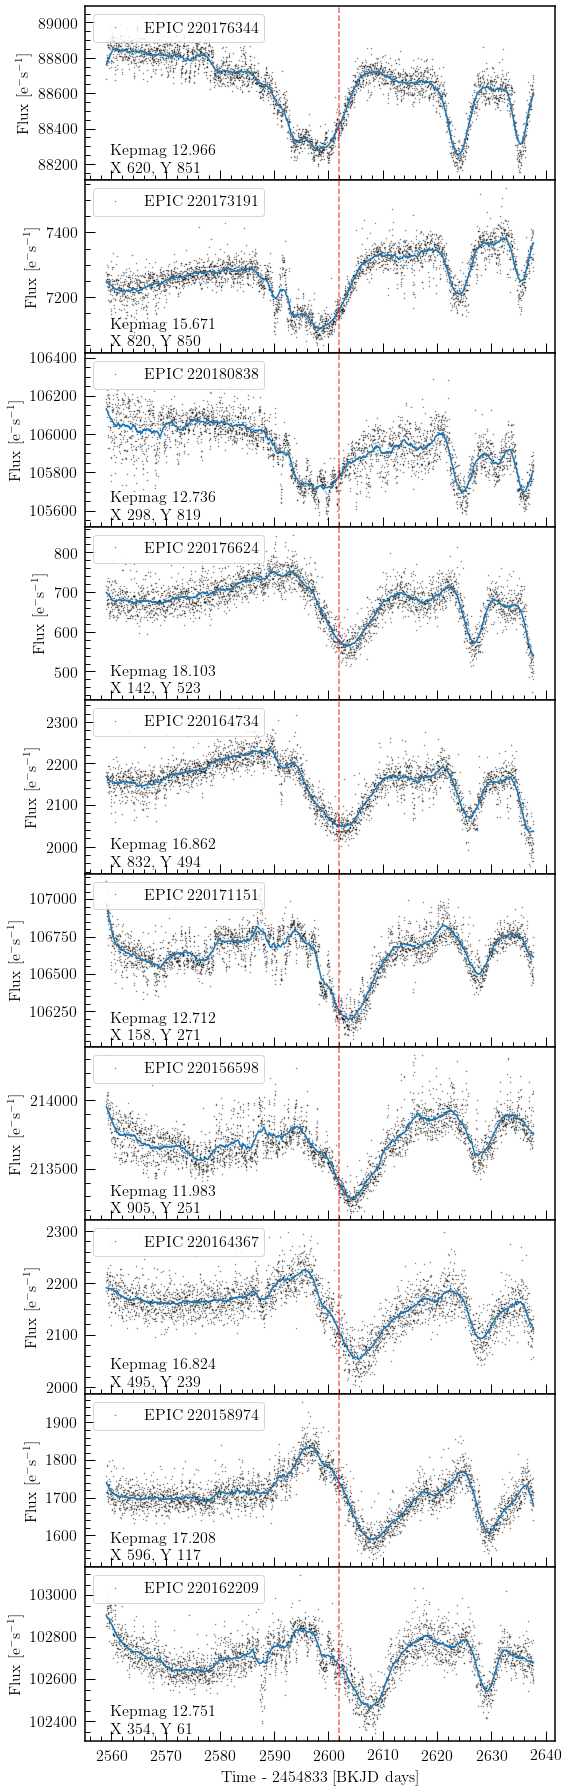

In [13]:
# FIGURE CODE HERE!

fig, ax = plt.subplots(len(epics_m2),1, figsize=(8,25), sharex=True, gridspec_kw = {'wspace':0, 'hspace':0})
#gs1 = gridspec.GridSpec(len(epics_m2),1)
#gs1.update(wspace=0.025, hspace=0.00) # set the spacing between axes. 

sort = sort_row.copy()[::-1]

for i, epic in enumerate(epics_m2[sort]):
    genuine_tpf = lk.search_targetpixelfile(epic, mission='K2', campaign=8).download()
    #print(genuine_tpf.pipeline_mask.shape[0]*genuine_tpf.pipeline_mask.shape[1])
    
    # remove spurious cadencess
    cor_lc = genuine_tpf.to_lightcurve(aperture_mask="all")
    _, spurious_cadences = cor_lc.flatten().remove_outliers(return_mask=True)
    lc_clean_sff = cor_lc[~spurious_cadences]

    #subtract 372.53 day sine fit to light curves
    #lc_clean_sff.time, lc_clean_sff.flux = subtract_sine(lc_clean_sff.time, lc_clean_sff.flux)

    lc_clean_sff.plot(normalize=False, color='k', marker = '.', ls='', alpha=0.5, ax=ax[i])

    # create and plot smoothed version
    flux_smooth = convolve(lc_clean_sff.flux, Box1DKernel(100), boundary='extend')
    ax[i].plot(lc_clean_sff.time, flux_smooth)
    ax[i].text(lc_clean_sff.time[30], np.min(lc_clean_sff.flux), "Kepmag %.3f \n X %s, Y %s"%(mags_m2[sort][i], genuine_tpf.column, genuine_tpf.row), fontsize=16)

    #ax[i].plot(np.ones(2)*shifts_m2[sort][i], ax[i].get_ylim(), 'r--', alpha=0.6, label="%s days"%shifts_m2[sort][i])
    
    # plot the red line
    # mid campaign
    #middle = 0.5*(np.max(lc_clean_sff.time)- np.min(lc_clean_sff.time))+ np.min(lc_clean_sff.time)
    ax[i].plot(np.ones(2)*2602, ax[i].get_ylim(), 'r--', alpha=0.6)
    ax[i].margins(y=0)
    ax[i].yaxis.label.set_fontsize(16)
    ax[i].legend(loc="upper left", fontsize=16)
    if i<len(epics_m2)-1:
        ax[i].set_xlabel("")
    else:
        ax[i].xaxis.label.set_fontsize(16)




plt.tight_layout()
plt.savefig("submit/Plots/C8_Ch55_byrow.pdf")

WARNING [matplotlib.font_manager._findfont_cached()]: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


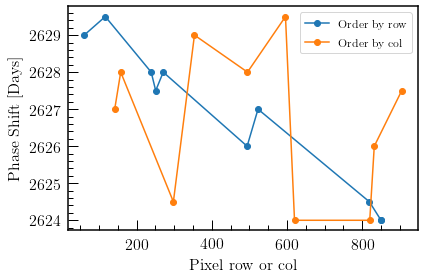

In [14]:
plt.plot(rows[sort_row],  shifts_m2[sort_row], marker='o', label="Order by row")
plt.plot(cols[sort_col],  shifts_m2[sort_col], marker='o', label="Order by col")
plt.xlabel("Pixel row or col")
plt.ylabel("Phase Shift [Days]")
#plt.title("K2 Campaign 8 Channel 55---select objects")
plt.legend()
plt.tight_layout()
plt.savefig("submit/Plots/C8_ch55_Position_dependence.pdf")